<h1> Hierarchical clustering </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

<h2> Preparando datos de prueba </h2>

In [5]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1':X[:,0],
        'x2':X[:,1],
        'y':y,
    }
)
df_centers = pd.DataFrame(
    {
        'x1':c[:,0],
        'x2':c[:,1],
    }
)

<h3> Visualización de datos. </h3>

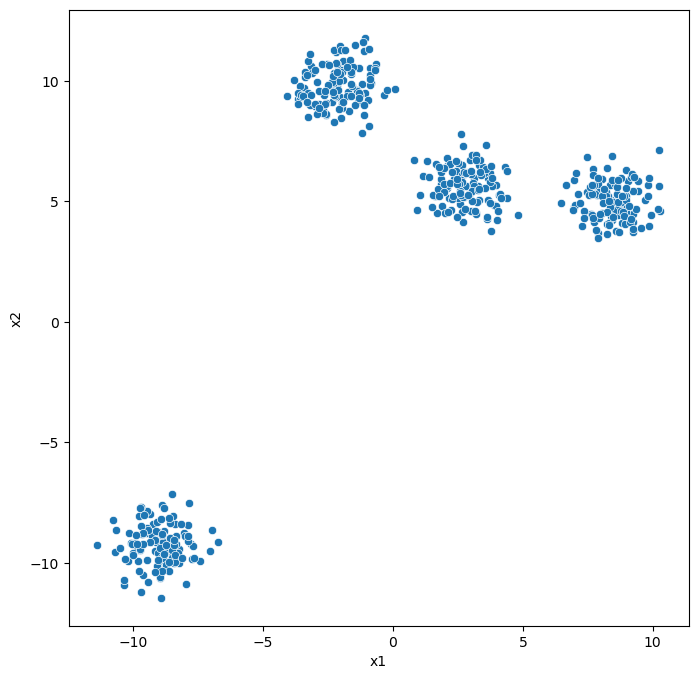

In [7]:
fig = plt.figure(figsize = (8, 8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
plt.show()

<h3> Dendrograma - hierarchical clustering </h3>

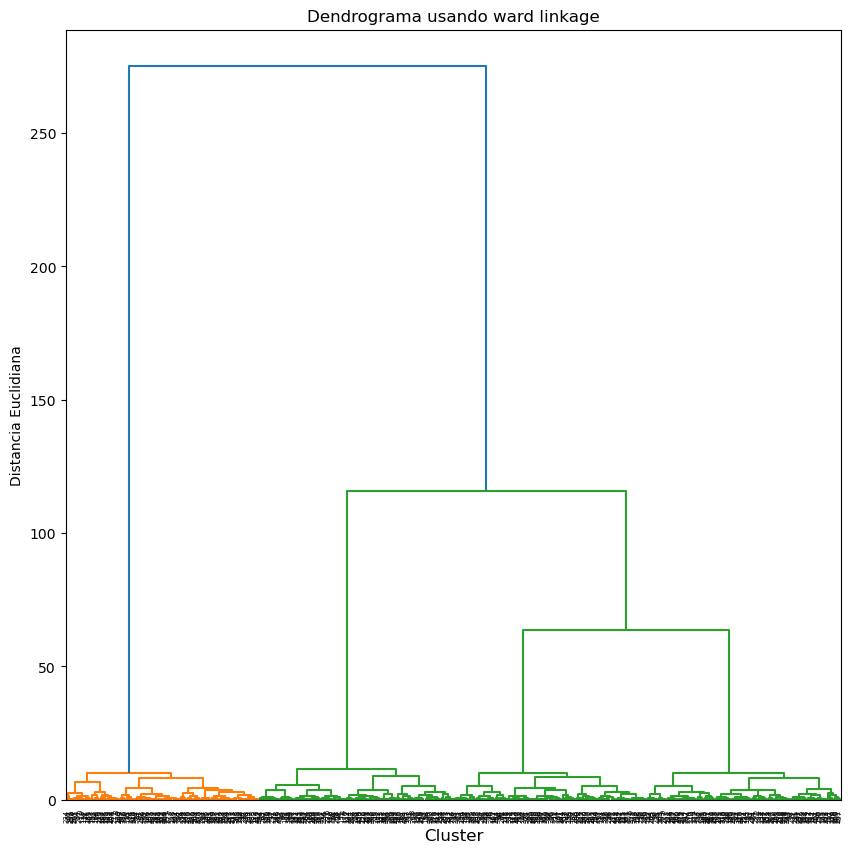

In [9]:
fig = plt.figure(figsize = (10,10))
dendrogram_plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendrograma usando ward linkage')
plt.xlabel('Cluster', fontsize = 12)
plt.ylabel('Distancia Euclidiana')
plt.show()

In [10]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [12]:
df_blobs['cluster'] = y_hc

In [13]:
df_blobs

,x1,x2,y,cluster
0,-9.871743,-9.448240,3,3
1,7.859551,5.286091,1,2
2,8.580837,3.793161,1,2
3,-0.859487,9.900749,0,0
4,-2.709930,8.685319,0,0
...,...,...,...,...
495,-1.865050,11.264401,0,0
496,-1.781658,10.570019,0,0
497,9.842630,5.977722,1,2
498,2.473218,5.935056,2,1


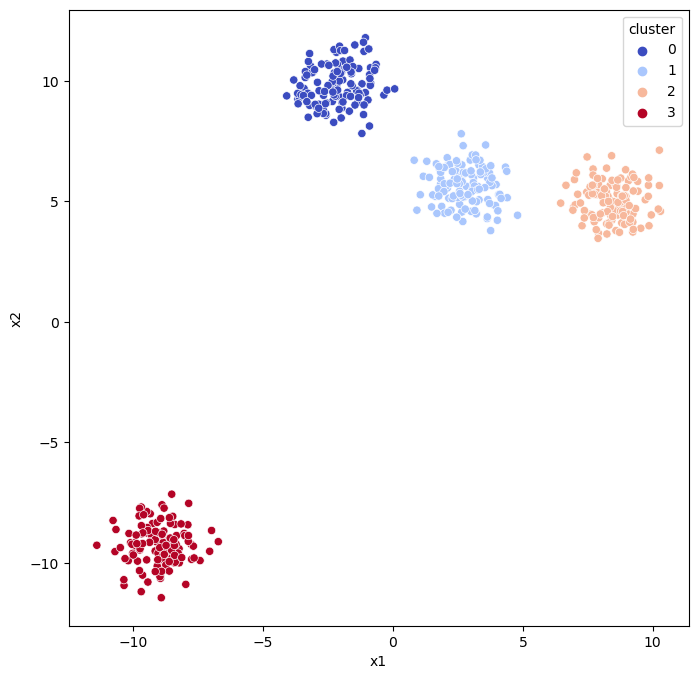

In [14]:
fig = plt.figure(figsize = (8, 8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
plt.show()